In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency, spearmanr
import matplotlib.pyplot as plt

from pandas import DataFrame

In [2]:
address = '..\data\mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

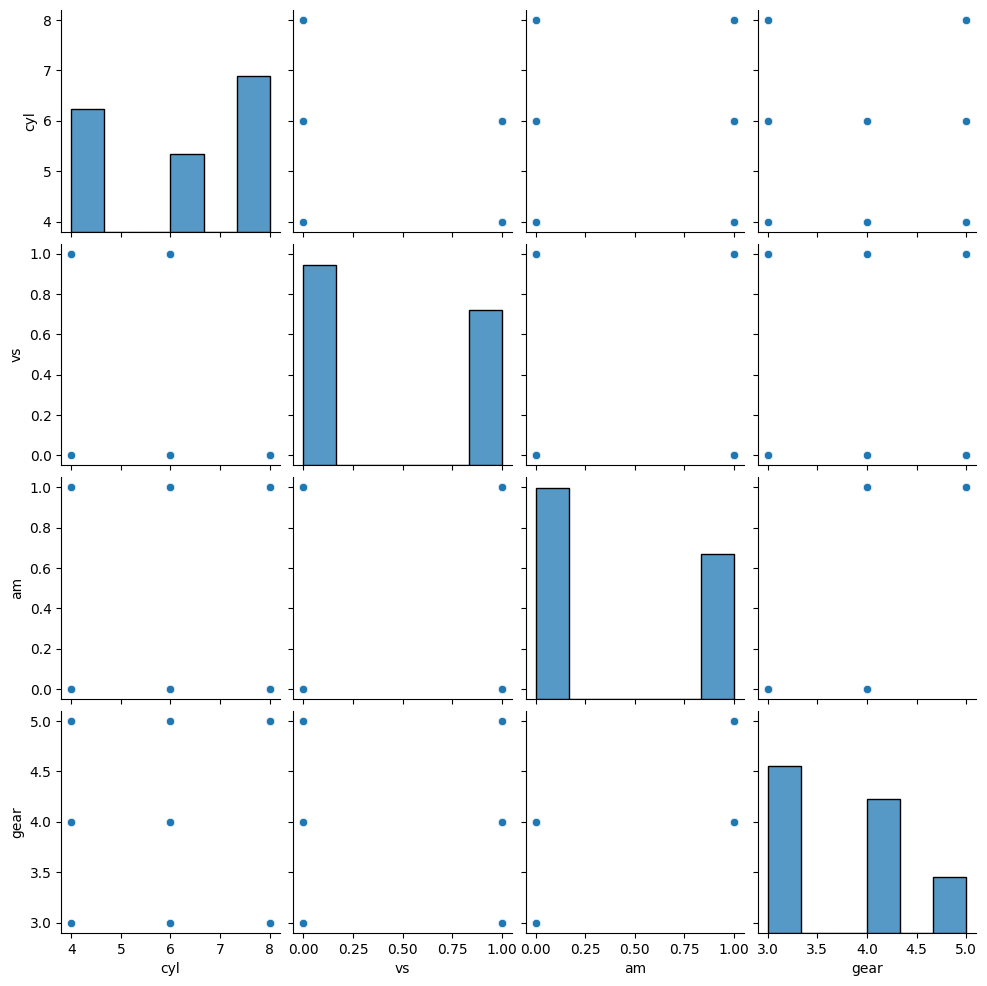

In [5]:
x = cars[['cyl', 'vs', 'am', 'gear']]
sns.pairplot(x)

In [21]:
x_df = DataFrame(x)
x_df.head(20)

,cyl,vs,am,gear
0,6,0,1,4
1,6,0,1,4
2,4,1,1,4
3,6,1,0,3
4,8,0,0,3
5,6,1,0,3
6,8,0,0,3
7,4,1,0,4
8,4,1,0,4
9,6,1,0,4


In [25]:
x_rank = x_df.rank(axis=1)
x_rank

,cyl,vs,am,gear
0,4.0,1.0,2.0,3.0
1,4.0,1.0,2.0,3.0
2,3.5,1.5,1.5,3.5
3,4.0,2.0,1.0,3.0
4,4.0,1.5,1.5,3.0
5,4.0,2.0,1.0,3.0
6,4.0,1.5,1.5,3.0
7,3.5,2.0,1.0,3.5
8,3.5,2.0,1.0,3.5
9,4.0,2.0,1.0,3.0


In [23]:
x_rank.sum(axis=1)

0     10.0
1     10.0
2     10.0
3     10.0
4     10.0
5     10.0
6     10.0
7     10.0
8     10.0
9     10.0
10    10.0
11    10.0
12    10.0
13    10.0
14    10.0
15    10.0
16    10.0
17    10.0
18    10.0
19    10.0
20    10.0
21    10.0
22    10.0
23    10.0
24    10.0
25    10.0
26    10.0
27    10.0
28    10.0
29    10.0
30    10.0
31    10.0
dtype: float64

In [32]:
# Shapiro-Wilk test
car_data = {'cyl', 'am', 'gear', 'vs'}
for i in car_data:
    stat, p = stats.shapiro(x_df[i])
    print(i)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Data looks normally distributed')
    else:
        print('Data does not look normally distributed')

vs
Statistics=0.632, p=0.000
Data does not look normally distributed
gear
Statistics=0.773, p=0.000
Data does not look normally distributed
am
Statistics=0.625, p=0.000
Data does not look normally distributed
cyl
Statistics=0.753, p=0.000
Data does not look normally distributed


In [33]:
cyl = cars['cyl']
am = cars['am']
vs = cars['vs']
gear = cars['gear']

stat, p = spearmanr(cyl, vs)
print("Spearman Rank Correlation Coefficient = %.3f, p = %.3f" % (stat, p))

Spearman Rank Correlation Coefficient = -0.814, p = 0.000


In [34]:
stat, p = spearmanr(cyl, am)
print("Spearman Rank Correlation Coefficient = %.3f, p = %.3f" % (stat, p))

Spearman Rank Correlation Coefficient = -0.522, p = 0.002


In [35]:
stat, p = spearmanr(cyl, gear)
print("Spearman Rank Correlation Coefficient = %.3f, p = %.3f" % (stat, p))

Spearman Rank Correlation Coefficient = -0.564, p = 0.001


In [36]:
x_df.corr()

,cyl,vs,am,gear
cyl,1.000000,-0.810812,-0.522607,-0.492687
vs,-0.810812,1.000000,0.168345,0.206023
am,-0.522607,0.168345,1.000000,0.794059
gear,-0.492687,0.206023,0.794059,1.000000


In [37]:
table = pd.crosstab(cyl, am)
chi2, p, dof, expected = chi2_contingency(table.values)
print("Chi-square Statistic = %.3f, p = %.3f" % (chi2, p))

Chi-square Statistic = 8.741, p = 0.013


In [38]:
table_2 = pd.crosstab(cyl, vs)
chi2, p, dof, expected = chi2_contingency(table_2.values)
print("Chi-square Statistic = %.3f, p = %.3f" % (chi2, p))

Chi-square Statistic = 21.340, p = 0.000


In [39]:
table_3 = pd.crosstab(cyl, gear)
chi2, p, dof, expected = chi2_contingency(table_3.values)
print("Chi-square Statistic = %.3f, p = %.3f" % (chi2, p))

Chi-square Statistic = 18.036, p = 0.001


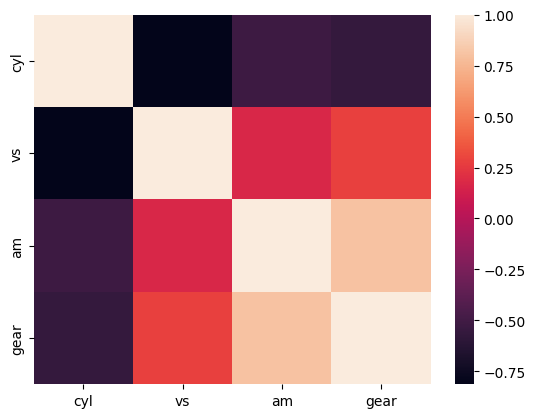

In [41]:
x_corr_spearman = x_df.corr(method='spearman')
sns.heatmap(x_corr_spearman)
plt.show()

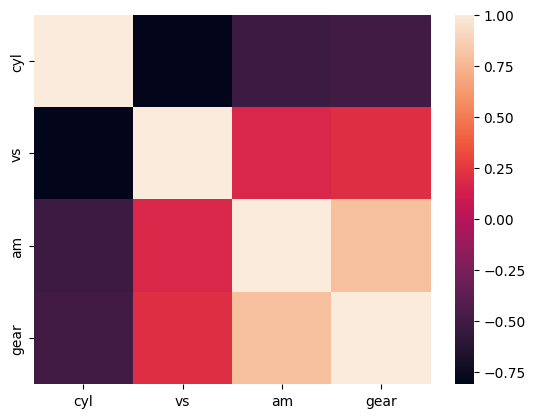

In [42]:
x_corr_pearson = x_df.corr(method='pearson')
sns.heatmap(x_corr_pearson)
plt.show()